In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Loading the train data
df_train = pd.read_csv('Train.csv')
# Looking top 10 rows
df_train.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [4]:
# Looking the bigger picture
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [5]:
# Checking the number of missing values in each column
df_train.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [6]:

# Loading the train data
df_test = pd.read_csv('Test.csv')

# Looking top 10 rows
df_test.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6
7,459008,Female,Yes,47,Yes,Artist,1.0,Average,3.0,Cat_6
8,459013,Male,Yes,50,Yes,Artist,2.0,Average,4.0,Cat_6
9,459014,Male,No,19,No,Healthcare,0.0,Low,4.0,Cat_6


In [7]:
# Looking the bigger picture
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [8]:
# Checking the number of missing values in each column
df_test.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [9]:
# Removing all those rows that have 3 or more missing values
df_train = df_train.loc[df_train.isnull().sum(axis=1)<3]

In [10]:
# Looking random 10 rows of the data
df_train.sample(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
7826,460314,Female,No,39,No,Healthcare,4.0,Low,3.0,Cat_6,D
219,465837,Male,No,62,Yes,NaN,0.0,Low,1.0,Cat_6,A
3891,463158,Male,Yes,83,Yes,Executive,0.0,High,3.0,Cat_6,B
5421,467495,Male,Yes,66,No,Artist,2.0,High,3.0,Cat_6,C
2102,464793,Female,Yes,26,No,Marketing,7.0,High,3.0,Cat_4,A
1912,459105,Male,Yes,39,Yes,Executive,5.0,High,3.0,Cat_6,C
5479,460384,Female,Yes,32,Yes,Marketing,8.0,Low,2.0,Cat_6,D
5798,462271,Male,Yes,45,Yes,Executive,2.0,Average,4.0,Cat_2,B
3647,461541,Male,No,36,Yes,Executive,9.0,Low,3.0,Cat_6,D
5926,462328,Male,No,27,No,Engineer,0.0,Low,5.0,Cat_6,D


In [11]:
# Removing all those rows that have 3 or more missing values
df_test = df_test.loc[df_test.isnull().sum(axis=1)<3]

In [12]:
# Looking random 10 rows of the data
df_test.sample(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
2510,467580,Male,No,27,Yes,Doctor,NaN,Low,3.0,Cat_6
1694,464766,Female,Yes,48,No,Engineer,5.0,Average,5.0,Cat_4
1801,465128,Female,Yes,58,No,Artist,0.0,Average,3.0,Cat_6
1649,464608,Female,Yes,53,Yes,Artist,1.0,Average,3.0,Cat_6
681,461233,Male,Yes,38,Yes,Entertainment,NaN,Low,NaN,Cat_3
1685,464737,Female,Yes,57,No,Engineer,0.0,Average,6.0,Cat_4
2097,466153,Male,Yes,73,No,Entertainment,0.0,Average,2.0,Cat_6
1194,462994,Female,Yes,36,No,Artist,NaN,Average,3.0,Cat_6
1912,465518,Female,Yes,41,Yes,Artist,1.0,Average,3.0,Cat_4
346,460119,Male,No,29,Yes,Healthcare,1.0,Low,4.0,Cat_6


In [13]:
print('The catagory count\n',df_train.Var_1.value_counts())

The catagory count
 Cat_6    5232
Cat_4    1084
Cat_3     820
Cat_2     422
Cat_7     201
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64


In [14]:
# Checking for null values
df_train.Var_1.isnull().sum()

72

In [15]:
# Filling the missing values w.r.t other attributes underlying pattern 
df_train.loc[ (pd.isnull(df_train['Var_1'])) & (df_train['Graduated'] == 'Yes'),"Var_1"] = 'Cat_6'
df_train.loc[ (pd.isnull(df_train['Var_1'])) & (df_train['Graduated'] == 'No'),"Var_1"] = 'Cat_4'
df_train.loc[ (pd.isnull(df_train["Var_1"])) & ((df_train['Profession'] == 'Lawyer') | (df_train['Profession'] == 'Artist')),"Var_1"] = 'Cat_6'
df_train.loc[ (pd.isnull(df_train["Var_1"])) & (df_train['Age'] > 40),"Var_1"] = 'Cat_6'

In [16]:
# Checking for null values
df_test.Var_1.isnull().sum()

29

In [17]:
numerical_columns_train=['ID','Age','Work_Experience','Family_Size' ]
categorical_columns_train=['Gender','Ever_Married','Graduated','Profession','Spending_Score','Var_1','Segmentation']

In [18]:
numerical_columns_test=['ID','Age','Work_Experience','Family_Size' ]
categorical_columns_test=['Gender','Ever_Married','Graduated','Profession','Spending_Score','Var_1']

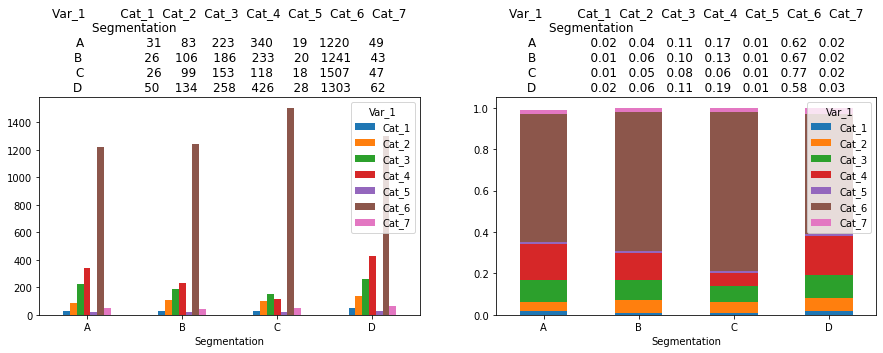

In [20]:
# Counting Var_1 in each segment
ax1 = df_train.groupby(["Segmentation"])["Var_1"].value_counts().unstack().round(3)

# Percentage of category of Var_1 in each segment
ax2 = df_train.pivot_table(columns='Var_1',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()



In [21]:
# Checking the count of missing values
df_train.Gender.isnull().sum()

0

In [22]:
# Checking the count of missing values
df_test.Gender.isnull().sum()

0

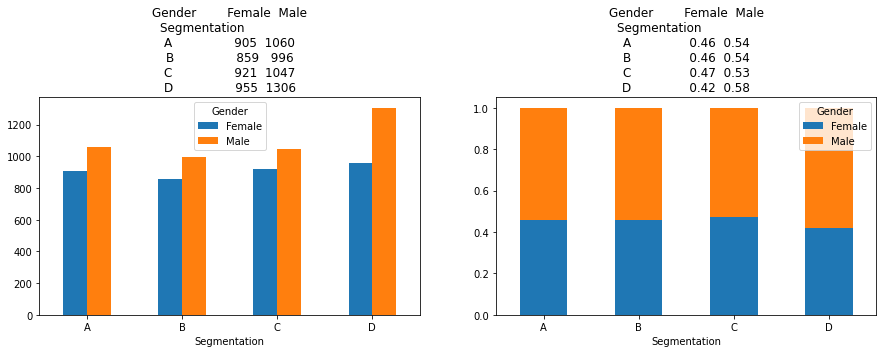

In [23]:
# Counting male-female in each segment
ax1 = df_train.groupby(["Segmentation"])["Gender"].value_counts().unstack().round(3)

# Percentage of male-female in each segment
ax2 = df_train.pivot_table(columns='Gender',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()


In [24]:
print('The count grouped by marital status\n',df_train.Ever_Married.value_counts())

The count grouped by marital status
 Yes    4635
No     3280
Name: Ever_Married, dtype: int64
